In [68]:
from yuning_util.dev_mode import DevMode
dev_mode = DevMode('k-seq')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
import k_seq
reload(k_seq)
from k_seq.data import simu
from k_seq.model import kinetic, pool, count
from k_seq.utility import plot_tools, doc_helper
reload(doc_helper)
reload(kinetic)
reload(pool)
reload(simu)
reload(plot_tools)

plt.style.use('seaborn')

# Count data simulation
This notebook simulate k-seq count dataset from 1) independent parametric distributions; 2) fitted results, for method evaluation

# Simulate from individual distribution
### Even pools of 1,000 unique sequences with different sequence depth
- A were sampled from 0, 1
- 95% of k were sampled from 0.1 to 200
- error rate for total DNA is 10%

Calculating sequencing depth 10
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use multinomial distribution
SeqTable created
Import type pd.Dataframe, not sparse, convert to sparse table
Data value imported from Pandas DataFrame, dtype=count


/home/yuning/research/k-seq/src/k_seq/data/simu.py:358: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  dna_amount.to_csv(f'{save_path}/dna_amount.csv')


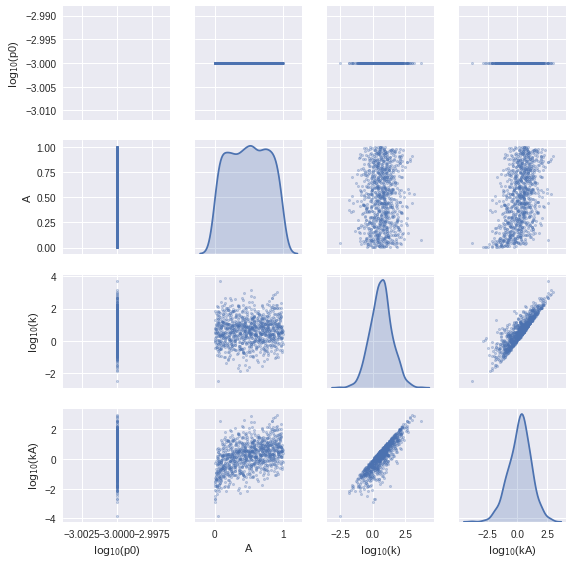

Calculating sequencing depth 40
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use multinomial distribution
SeqTable created
Import type pd.Dataframe, not sparse, convert to sparse table
Data value imported from Pandas DataFrame, dtype=count


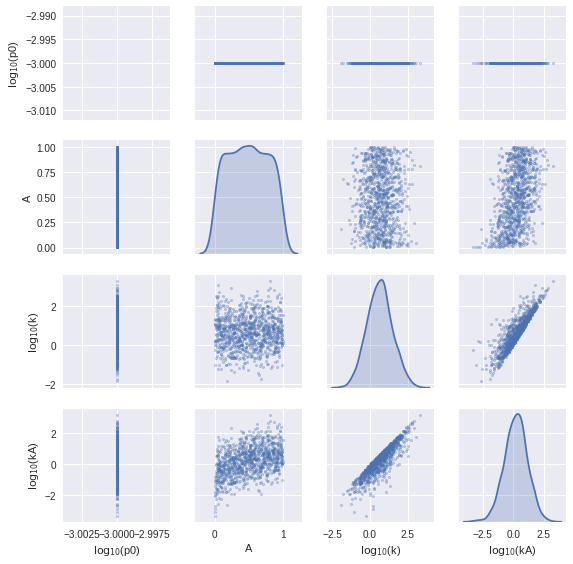

Calculating sequencing depth 500
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use multinomial distribution
SeqTable created
Import type pd.Dataframe, not sparse, convert to sparse table
Data value imported from Pandas DataFrame, dtype=count


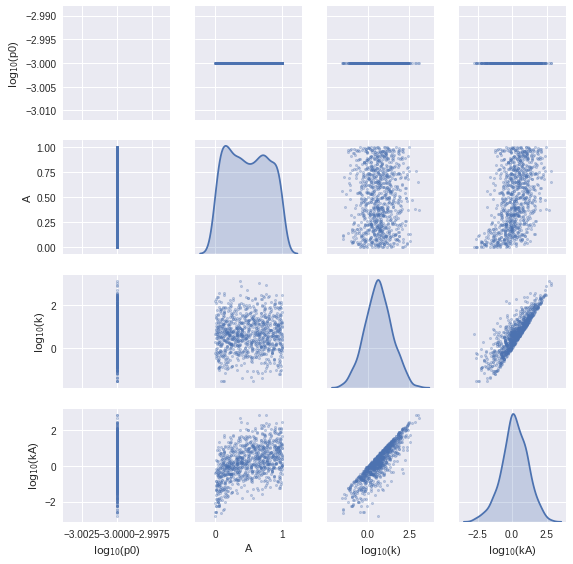

In [75]:
reload(simu)

output_path = '/mnt/storage/projects/k-seq/datasets/simulated/from_dist'

configs = [
    {'depth': 10},
    {'depth': 40},
    {'depth': 500}
]

for config in configs:
    print(f"Calculating sequencing depth {config['depth']}")
    _ = simu.simulate_w_byo_doped_condition_from_param_dist(
        uniq_seq_num=1_000,
        depth=config['depth'],
        p0_loc=0,
        p0_scale=0,
        k_95=[0.1, 200],
        total_dna_error_rate=0.1,
        seed=23,
        save_to=f"{output_path}/seq-1e3-p0-even-depth-{config['depth']}-error-10pct"
    )
    plt.show()

# Simulate from data

We simulate pool from estimated data to mimic the actual distribution

We use `least-squared` point-estimation for `doped-pool` as template for sampling 

- We filtered the sequence by the sequences we can perform classic least squared fitting (that only contains sequences observed in the input pool

In [79]:
reload(simu)
reload(k_seq)
from k_seq.estimator import least_square
reload(least_square)

x, Y, dna_amount, truth, seq_table = simu.simulate_w_byo_doped_condition_from_exp_results(
    point_est_csv='/mnt/storage/projects/k-seq/working/byo-doped/least_square/pandaSeq/point-est_2019-12/table-total-dna_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-20/fit_summary.csv',
    seqtable_path='/mnt/storage/projects/k-seq/datasets/byo-doped-pandaSeq.pkl',
    uniq_seq_num=1e3,
    total_dna_error_rate=0.1,
    depth=40,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000_d40/',
    plot_dist=True
)

AttributeError: Can't get attribute 'DnaAmountNormalizer' on <module 'k_seq.data.transform' from '/home/yuning/research/k-seq/src/k_seq/data/transform.py'>

In [81]:
from k_seq.data import datasets
seq_table = datasets.load_dataset('byo-doped', from_count_file=True)

Generate SeqTable instance for BYO-doped pool...
Importing from /mnt/storage/projects/k-seq/working/byo_doped/read_join/no-mismatch-assembly-first/counts...this could take a couple of minutes...


AttributeError: type object 'SeqTable' has no attribute 'from_count_files'

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


/home/yuning/research/k-seq/src/k_seq/data/simu.py:287: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  dna_amount.to_csv(f'{save_path}/dna_amount.csv')
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

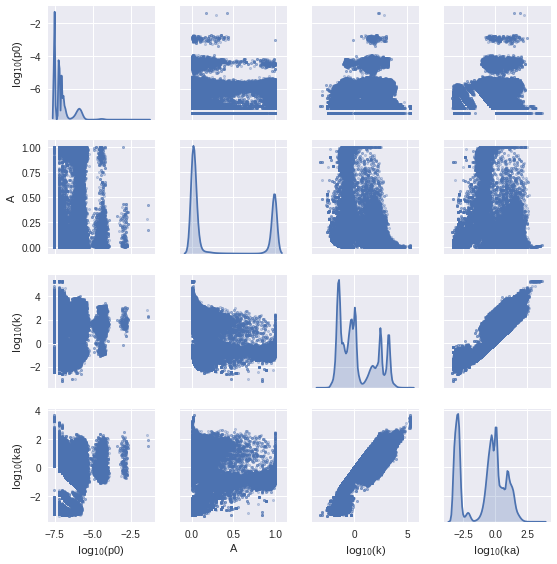

In [6]:
reload(simu)

x, Y, dna_amount, truth, seq_table = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/all-seq-point-est_2019-11/table-spike_in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-40/fit_summary.csv'),
    seq_num=1e6,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000000_d40/'
    
)

In [10]:
from k_seq.utility.file_tools import read_pickle

seq_table = read_pickle('/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000000_d40/seq_table.pkl')

In [14]:
seq_table.table_reacted_frac

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15
seq,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.001688,0.000830,0.002879,0.000000,0.003445,0.000000,0.000000,0.007784,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.026241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323064
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027637,0.030164,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323064
14,0.000000,0.000000,0.000045,0.000185,0.000737,0.000000,0.001886,0.002570,0.000000,0.000000,0.000000,0.003399,0.000000,0.004244,0.015926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999991,0.000000,0.000000,0.000000,0.000000,0.001869,0.001838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046152
999993,0.000000,0.002144,0.004297,0.000000,0.000000,0.000000,0.059509,0.040546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
999995,0.000418,0.000390,0.000326,0.000795,0.001321,0.002599,0.000902,0.004915,0.003236,0.002947,0.006700,0.000000,0.000000,0.003043,0.006527


Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


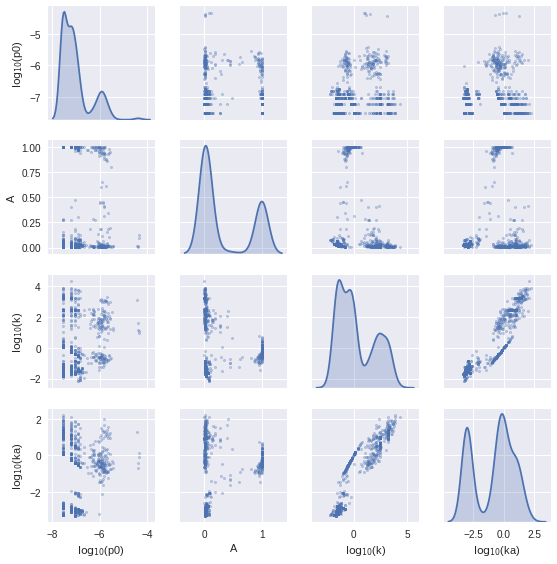

In [8]:
reload(simu)

x, Y, dna_amount, truth, seq_table = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/all-seq-point-est_2019-11/table-spike_in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-40/fit_summary.csv'),
    seq_num=1e3,
    depth=10,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000_d10/'
    
)

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo-doped.pkl
Imported!
No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


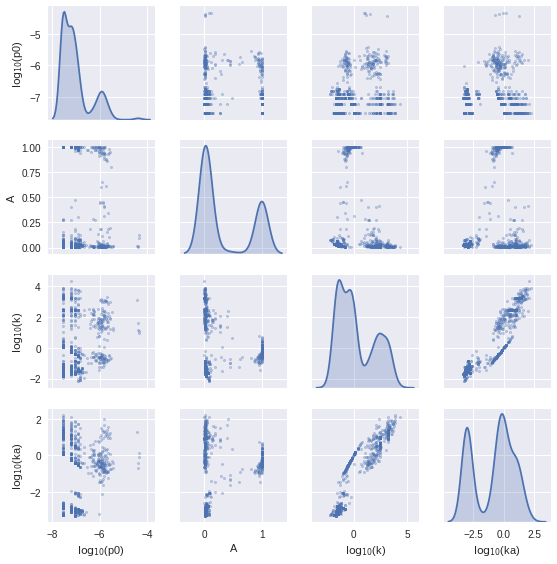

In [9]:
reload(simu)

x, Y, dna_amount, truth, seq_table = simu.simulate_from_sample(
    sample_table=simu.get_sample_table(
        seq_table='byo-doped',
        estimation='/mnt/storage/projects/k-seq/working/byo_doped/least_square/all-seq-point-est_2019-11/table-spike_in_bs-num-0_bs-mtd-data_no-zero-false_inv-weight-false_core-40/fit_summary.csv'),
    seq_num=1e3,
    depth=100,
    dna_amount_error=simu.dna_amount_error,
    save_to='/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s1000_d100/'
    
)

In [49]:
default_depth = 40

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


/home/yuning/research/k-seq/src/pkg/k_seq/data/simu.py:271: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  save_path.mkdir(parents=True, exist_ok=True)
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/yuning/.pyenv/versions/anaconda3-5.0.1/envs/k-seq/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

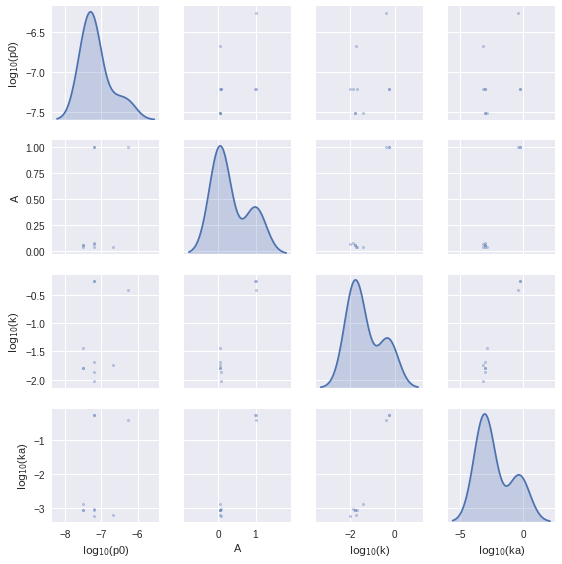

In [48]:
seq_num = 10
depth = default_depth
x, Y, dna_amount, truth = simulate_from_sample(
    seq_num=seq_num,
    depth=depth,
    dna_amount_error=dna_amount_error,
    save_to=f'/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s{seq_num}_d{depth}'
)

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


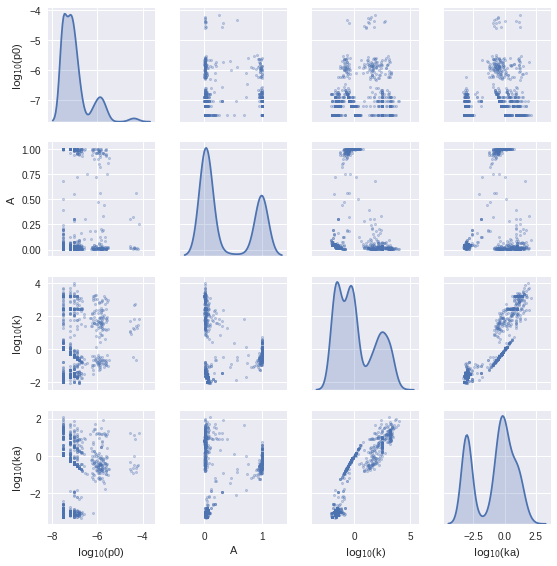

In [50]:
seq_num = 1000
depth = default_depth
x, Y, dna_amount, truth = simulate_from_sample(
    seq_num=seq_num,
    depth=depth,
    dna_amount_error=dna_amount_error,
    save_to=f'/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s{seq_num}_d{depth}'
)

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


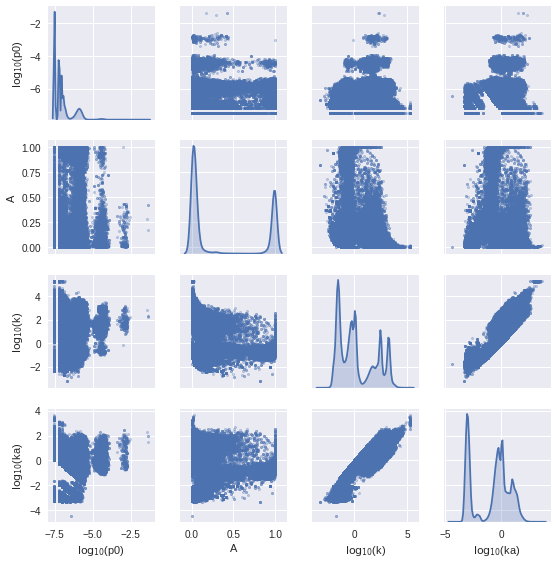

In [55]:
seq_num = 1_000_000
depth = default_depth
x, Y, dna_amount, truth = simulate_from_sample(
    seq_num=seq_num,
    depth=depth,
    dna_amount_error=dna_amount_error,
    save_to=f'/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s{seq_num}_d{depth}'
)

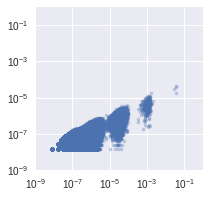

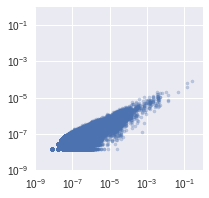

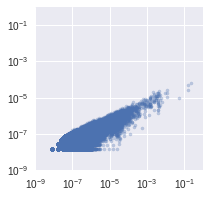

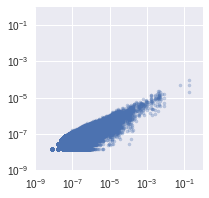

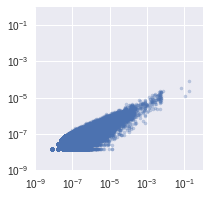

In [59]:
for sample in range(5):
    sample_list = [f"s{sample}-{rep}" for rep in range(3)]
    rel_abun = Y[sample_list] / Y[sample_list].sum(axis=0)
    plt.figure(figsize=[3, 3])
    plt.scatter(rel_abun.mean(axis=1), rel_abun.std(axis=1), s=10, alpha=0.3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([1e-9, 1])
    plt.ylim([1e-9, 1])

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


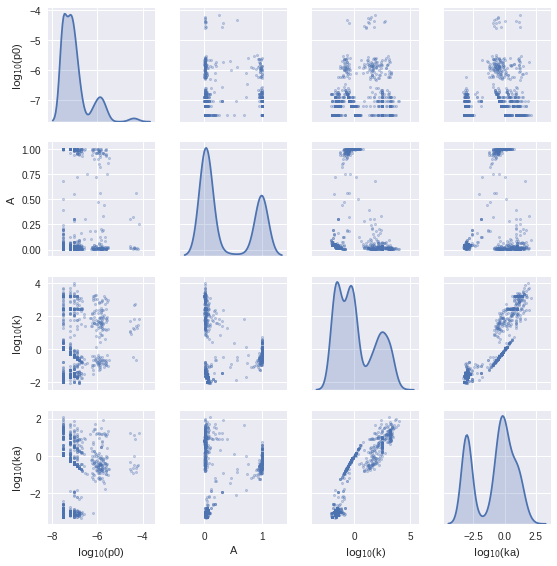

In [52]:
seq_num = 1_000
depth = 10
x, Y, dna_amount, truth = simulate_from_sample(
    seq_num=seq_num,
    depth=depth,
    dna_amount_error=dna_amount_error,
    save_to=f'/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s{seq_num}_d{depth}'
)

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


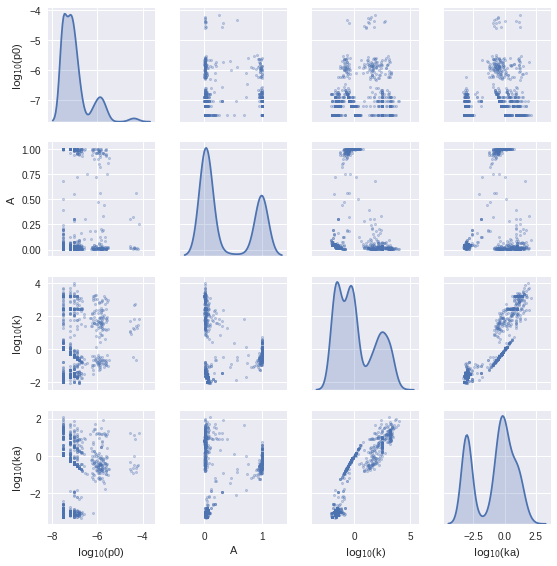

In [53]:
seq_num = 1_000
depth = 100
x, Y, dna_amount, truth = simulate_from_sample(
    seq_num=seq_num,
    depth=depth,
    dna_amount_error=dna_amount_error,
    save_to=f'/mnt/storage/projects/k-seq/datasets/simulated/on_doped_s{seq_num}_d{depth}'
)

No kinetic model provided, use BYOModel.amount_first_order
No count model provided, use MultiNomial


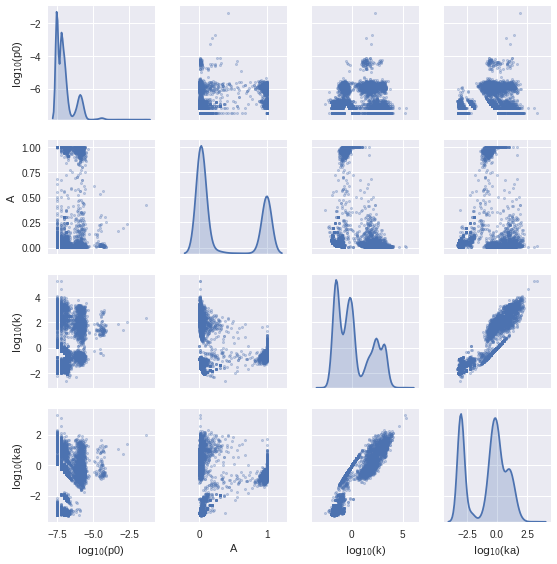

In [54]:
seq_num = 10_000
depth = 100
x, Y, dna_amount, truth = simulate_from_sample(
    seq_num=seq_num,
    depth=depth,
    dna_amount_error=dna_amount_error,
    save_to=None
)

### Snippet for create gif

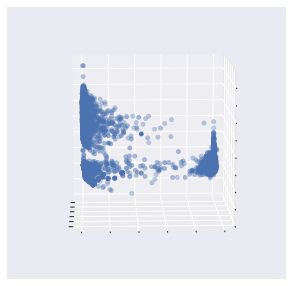

In [71]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log10(truth.p0), truth.A, np.log10(truth.k))
ax.set_xticklabels([])
#ax.set_xticks([])
ax.set_yticklabels([])
#ax.set_yticks([])
ax.set_zticklabels([])
#ax.set_zticks([])

for angle in range(0, 180):
    ax.view_init(10, angle * 2)
    plt.savefig(f'/mnt/storage/projects/k-seq/working/byo_doped/dataset_vis/seq_dist/gif/r_{angle * 2}.png', bbox_inches='tight')

In [72]:
from IPython import display
from PIL import Image
import glob

def get_img_num(img):
    file_name = img.filename[img.filename.rfind('/') + 1:-4]
    return int(file_name.split('_')[-1])

img, *imgs = sorted([Image.open(image) for image in glob.glob('/mnt/storage/projects/k-seq/working/byo_doped/dataset_vis/seq_dist/gif/*.png')], key=get_img_num)
img.save(fp='/mnt/storage/projects/k-seq/working/byo_doped/dataset_vis/seq_dist/gif/movie.gif',
         format='GIF', append_images=imgs,
         save_all=True, duration=150, loop=0)

## [Analysis] Caveats of sampling from a heterogenous pool

If not weighting each unique sequences, it will be more likely to sample the low pct seqs.

QUESTION: what does the heterogeneity means here? Entropy?

In [212]:
simu_pool_sizes = [-1, 1e1, 1e3, 1e5, 1e6, 1e7, 1e8]
from k_seq.data.simu import PoolParamSimulator

sampled_pool = [ls_point_est if size < 0 else PoolParamSimulator.sample_from_dataframe(df=ls_point_est, size=int(size),
                                                                                       seed=23)
                for size in simu_pool_sizes]

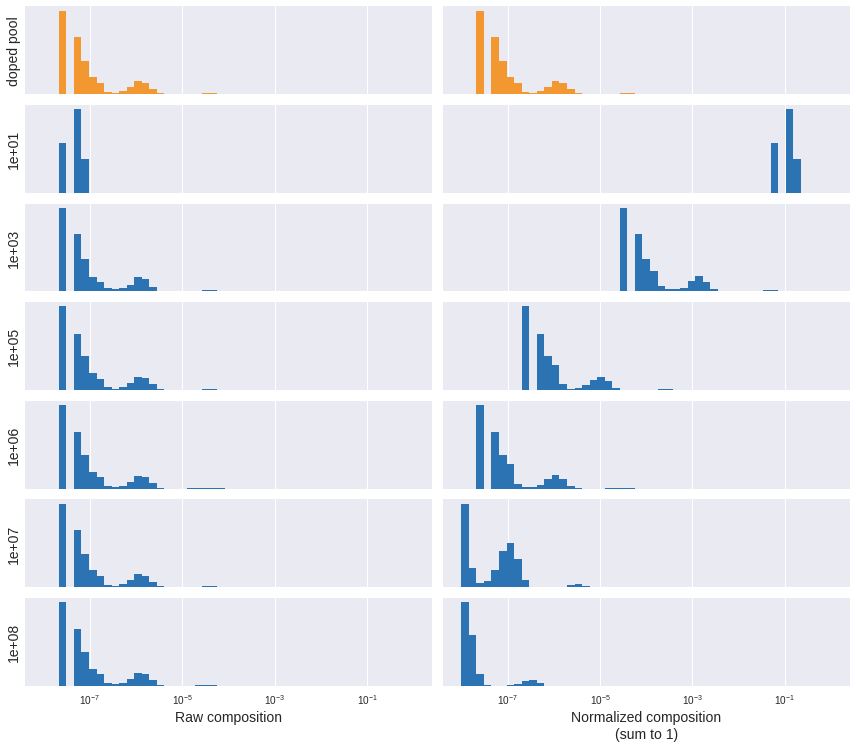

In [213]:
fig, axes = plt.subplots(len(simu_pool_sizes), 2,
                         figsize=[6 * 2, 1.5 * len(simu_pool_sizes)],
                         sharex=True)
fig.subplots_adjust(hspace=0.01, wspace=0.01)

bins = np.logspace(-8, 0, 50)
for ax, sample, size in zip(axes, sampled_pool, simu_pool_sizes):
    ax[0].hist(sample['p0'], bins=bins, color='#F39730' if size < 0 else '#2C73B4')
    ax[0].set_xscale('log')
    ax[0].set_yticks([])
    ax[0].set_ylabel('doped pool' if size <0 else f'{size:1.0e}', fontsize=14)
    ax[1].hist(sample['p0']/sample['p0'].sum(), bins=bins, color='#F39730' if size < 0 else '#2C73B4')
    ax[1].set_xscale('log')
    ax[1].set_yticks([])
axes[-1][0].set_xlabel('Raw composition', fontsize=14)
axes[-1][1].set_xlabel('Normalized composition\n(sum to 1)', fontsize=14)

plt.tight_layout()
plt.show()

In [214]:
def get_entropy(series, normalize=True, base=2):
    if pd.api.types.is_sparse(series):
        series = series.sparse.to_dense()
    series = series / np.sum(series)
    if normalize:
        return -np.sum(series * np.log(series)) / np.log(len(series))
    else:
        return -np.sum(series * np.log(series)) / np.log(base)

In [215]:
entropy_efficiency = [get_entropy(pool['p0'], normalize=True) for pool in sampled_pool]

In [216]:
entropy_efficiency

[0.6483428703023708,
 0.9696468912182086,
 0.6109410935818711,
 0.5089605113954405,
 0.6576124812379042,
 0.7006322329074502,
 0.7385569991223883]

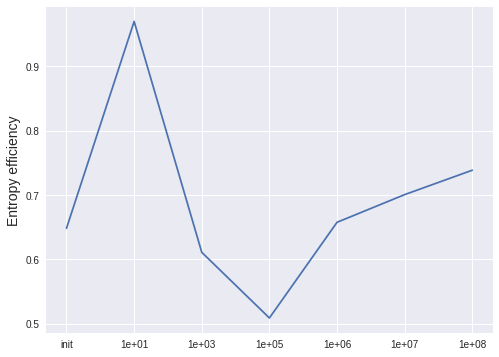

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.arange(len(simu_pool_sizes)), entropy_efficiency)
ax.set_xticks(np.arange(len(simu_pool_sizes)))
ax.set_xticklabels(['init' if size < 0 else f'{size:1.0e}' for size in simu_pool_sizes])
ax.set_ylabel('Entropy efficiency', fontsize=14)
plt.show()